In [3]:
! pip install openai

In [4]:
! pip install langchain_community

In [5]:
! pip install langchain_chroma

In [4]:
! pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.7 MB/s eta 0:00:00


In [2]:
! pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.7/408.7 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.13
    Uninstalling langchain-core-0.3.13:
      Successfully uninstalled langchain-core-0.3.13
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.4
    Uninstalling langchain-0.3.4:
      Successfully uninstalled langchain-0.3.4


In [20]:
! pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.7/615.7 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 5.1 MB/s eta 0:00:

In [45]:
! pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 4.7 MB/s eta 0:00:00


# HyDE : Advanced RAG (Query Optimization Technique)

Why hypothetical document embeddings (HyDE)?
Traditional document retrieval in RAG models relies on matching queries with existing documents in a collection. This approach faces limitations:

Limited generalizability: Existing retrieval methods often struggle with unseen domains or queries with subtle variations.

Factual accuracy: Retrieving documents based solely on keyword matching might lead to irrelevant or inaccurate information, especially for complex queries.

HyDE tackles these challenges by introducing the concept of hypothetical documents.

How HyDE works ?

Here’s a breakdown of the HyDE workflow:

Query processing: The user submits a query.

Hypothetical document generation: HyDE utilizes an LLM to create one or more “hypothetical documents” that address the query. These documents might not be factual or complete, but they capture the information a relevant document would contain. This generation process often involves prompting the LLM with instructions like “Write a short summary of a web page that answers the question...”.

Embedding creation: Each generated hypothetical document is then converted into a numerical representation called an embedding. This embedding captures the semantic meaning of the document.

Document retrieval: The system searches for existing documents in the collection whose embeddings are most similar to the hypothetical document embeddings. This process leverages vector similarity techniques.

Response generation: The retrieved documents are fed into the RAG model’s generation stage, where they are used to create a response to the user’s query.


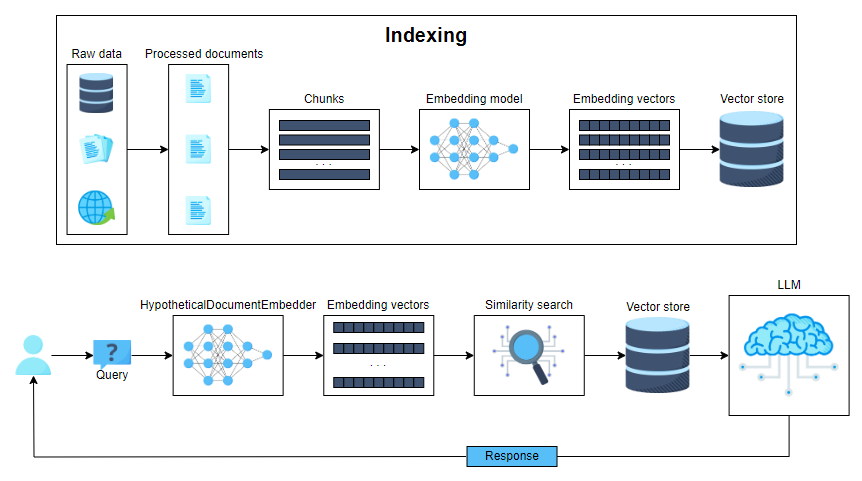

# Import necessary libraries

In [43]:
import os
from langchain_openai import OpenAI
from langchain_openai import OpenAIEmbeddings
from langchain.chains import HypotheticalDocumentEmbedder
from langchain.prompts import PromptTemplate
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.vectorstores import Chroma
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

# Set up the OpenAI API key

In [42]:
OPENAI_API_KEY = os.environ["OPENAI_API_KEY"] = ""  # Add your OpenAI API key
if OPENAI_API_KEY == "":
    raise ValueError("Please set the OPENAI_API_KEY environment variable")

# Load and split documents

Here, we load some example documents and prepare them for processing by the LLM. Since real-world documents might be lengthy, we’ll also perform text splitting to ensure they fit the LLM’s input limitations.

Initialize a list called loaders, containing instances of the PyPDFLoader class from LangChain. These loaders are used to load text files containing the documents to be processed.

Iterate over each loader in the loaders list and load the documents using the load() method of each loader. The documents loaded from each loader are then appended to the docs list.

Create an instance of the RecursiveCharacterTextSplitter class, specifying a chunk_size of 10000 characters. This splitter class is used to split large documents into smaller, more manageable chunks.

Call the split_documents() method of the text_splitter object with the docs list as input. This method splits each document into the docs list into smaller chunks using the specified chunk_size. The resulting split documents are then assigned back to the docs list.

In [46]:
loaders = [
    PyPDFLoader("Attention_is_all_you_need.pdf"),
    PyPDFLoader("Improvingaccuracyofpretrainedwordembeddingsforsentimentanalysis.pdf")
]

docs = []
for loader in loaders:
    docs.extend(loader.load())

text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000 , chunk_overlap=1000)
docs = text_splitter.split_documents(docs)

In [47]:
len(docs)

30

In [48]:
docs[0].page_content

'Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.com\nNoam Shazeer∗\nGoogle Brain\nnoam@google.com\nNiki Parmar∗\nGoogle Research\nnikip@google.com\nJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.com\nAidan N. Gomez∗ †\nUniversity of Toronto\naidan@cs.toronto.edu\nŁukasz Kaiser∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗ ‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer,\nbased solely on attention mechanisms, dispensing with recurren

In [49]:
docs[29].page_content

'[35] X. Ouyang, P. Zhou, C. Li, L. Liu, Sentiment Analysis Using Convolutional Neural Network, IEEE \nInternational Conference on Computer and Information Technology; Ubiquitous Computing and \nCommunications; Dependable, Autonomic and Secure Computing; Pervasive Intelligence and Computing \n(CIT/IUCC/DASC/PICOM). (2015) \n[36] J. Deriu, A. Lucchi, V. Luca, T. Hofmann, M. Jaggi, Leveraging Large Amounts of Weakly Supervised  \nData for Multi-Language Sentiment Classification, International World Wide Web Conference Committee \n(IW3C2). (2017) 1045-1052. \n[37] B. Pang, L. Lee, Seeing stars: Exploiting class relationships for sentiment categorization with respect \nto rating scales, In: Proceedings of the 43rd Annual Meeting on Association for Computational Linguistics. \n(2005) 115-124. \n[38] R. Socher, A. Perelygin, J.Wu, J. Chuang, C. Manning, A. Ng, C. Potts, Recursive Deep Models for \nSemantic Compositionality Over a Sentiment Treebank, In: Proceedings of EMNLP. (2013) \n[39] O.

# Create a vector store

A vector store serves as a critical component for retrieval in HyDE. It allows us to store document embeddings and efficiently search for documents similar to a hypothetical document embedding.

A vector store is created to facilitate information retrieval by indexing document embeddings.

In [50]:
vectorstore = Chroma.from_documents(documents=docs, embedding=OpenAIEmbeddings())

# Generate embeddings (single and multiple )

HyDE’s core functionality is generating embeddings representing hypothetical documents relevant to a user query. Here, we’ll explore generating both single and multiple embeddings.

Below is the implementation of single embedding generation :

Initialize the embedding model and LLM. The HypotheticalDocumentEmbedder class combines the capabilities of an OpenAI language model (LLM) with OpenAIEmbeddings for creating embeddings, specifically for the "web_search" context.

Define a query about Topic segmentation. This query string will be used to generate an embedding that represents the query in a numerical format.

Use the embedding model to generate an embedding for the query. The embed_query method processes the query string, converting it into an embedding vector that captures the semantic meaning of the query

Below is the implementation of multiple embedding generation 🇰

Initialize an OpenAI LLM with specific parameters. The n=3 parameter specifies generating three completions per prompt, and best_of=4 means choosing the best completion out of four attempts.

Initialize the embedding model using the previously created LLM. The HypotheticalDocumentEmbedder class combines the capabilities of multi_llm with OpenAIEmbeddings for creating embeddings, specifically for the "web_search" context.

Generate an embedding for a specific query. The embed_query method processes the query string "What is Topic segmentation, and why do we need it?", converting it into an embedding vector that captures the semantic meaning of the query.


In [56]:
# Single embedding generation

embeddings = HypotheticalDocumentEmbedder.from_llm(OpenAI(), OpenAIEmbeddings(), "web_search")

query = "What is topic segmentation, and why do we need it?"

result = embeddings.embed_query(query)

In [57]:
print(result)
print(len(result))

[-0.018563611432909966, 0.0045181941241025925, 0.014146100729703903, -0.016650615260004997, 0.0037787961773574352, 0.00938878208398819, -0.012579206377267838, 0.015706703066825867, -0.00853296834975481, -0.051474690437316895, -0.018060190603137016, 0.028015321120619774, -0.035390421748161316, -0.003907797392457724, 0.004329411778599024, 0.0065444596111774445, 0.03166511654853821, -0.003154240781441331, 0.0019633378833532333, -0.02245252951979637, -0.015392065048217773, -0.011144459247589111, -0.00893570389598608, 0.008212038315832615, -0.016700956970453262, 0.005015321541577578, 0.02541012316942215, -0.028720108792185783, -0.003077154513448477, 0.00893570389598608, -0.004486730322241783, 0.004275923129171133, -0.009313269518315792, -0.012308618053793907, 0.0011295485310256481, 0.026681257411837578, 0.02834254316985607, -0.009583857841789722, 0.00413119001314044, -0.030708618462085724, 0.005383447278290987, 0.008690287359058857, -0.004653488285839558, -0.012038029730319977, -0.012069493

In [58]:
# Multiple embedding generation

multi_llm = OpenAI(n=3, best_of=4)

embeddings = HypotheticalDocumentEmbedder.from_llm(multi_llm, OpenAIEmbeddings(), "web_search")

query = "What is topic segmentation, and why do we need it?"

result = embeddings.embed_query(query)

In [62]:
print(result)

[-0.02852812595665455, 0.007251317147165537, 0.015645265579223633, -0.02473609521985054, 0.01153932511806488, 0.0076280091889202595, -0.02669489197432995, -0.001345103606581688, -0.01583361253142357, -0.04429895430803299, -0.005060226656496525, 0.03350045904517174, -0.02757384069263935, -0.008858535438776016, 0.010453197173774242, 0.00017441615636926144, 0.036287978291511536, -0.013020980171859264, -0.012481055222451687, -0.0345049686729908, -0.018570905551314354, -0.007201091852039099, -0.009178723208606243, 0.02388226054608822, -0.022287597879767418, 0.00816793367266655, 0.02757384069263935, -0.017943086102604866, -0.005615847185254097, 0.0024751790333539248, -0.006767896004021168, -0.0014133789809420705, -0.009059437550604343, -0.02364368923008442, -0.004137331619858742, 0.028302110731601715, 0.027247373014688492, -0.010271130129694939, 0.006177745759487152, -0.025075117126107216, -0.004680395592004061, 0.009222671389579773, -0.003562876721844077, -0.005666072480380535, -0.008726693

In [67]:
import pandas as pd
pd.Series(result)

,0
0,-0.028528
1,0.007251
2,0.015645
3,-0.024736
4,0.011539
...,...
1531,-0.033777
1532,-0.003046
1533,-0.002940
1534,-0.018596


# Query the vector store for HyDE

Before delving into the HyDE technique, it’s essential to understand how to query the vector store to retrieve relevant information

Define the search query as a string. This specifies the information we’re looking for in the vector store.

Call the similarity_search method on the vectorstore object. This method performs the actual search within the vector store

In [72]:
query = "What is  Word2Vec, and why do we need it?"
vectorstore.similarity_search(query)

[Document(metadata={'page': 4, 'source': 'Improvingaccuracyofpretrainedwordembeddingsforsentimentanalysis.pdf'}, page_content='3. Proposed method \nIn our proposed method, Improved Word Vector (IWV) we have increased the accuracy of word embedding \nvectors based on the combination of natural language processing techniques, lexicon -based approaches \nand Word2Vec/GloVe methods which have high accuracies. The main architecture of the proposed method \nhas been shown in figure 1. \n \nFigure1: The main architecture of the proposed method (Improved word vector) \n \n3.1. Word2Vec and GloVe \nWord2Vec and GloVe are two successful word embedding algorithms which have high accuracy. Word2Vec \nis based on continuous Bag-of-Words (CBOW) and Skip-gram architectures which can provide high quality \nword embedding vectors. CBOW predicts a word given its context and S kip-gram can predict the context \ngiven a word. The generated vectors of words which appear in common contexts in the corpus are

In [74]:
query = "What is  encoder, and why do we need it?"
vectorstore.similarity_search(query)

[Document(metadata={'page': 1, 'source': 'Attention_is_all_you_need.pdf'}, page_content='1 Introduction\nRecurrent neural networks, long short-term memory [13] and gated recurrent [7] neural networks\nin particular, have been firmly established as state of the art approaches in sequence modeling and\ntransduction problems such as language modeling and machine translation [ 35, 2, 5]. Numerous\nefforts have since continued to push the boundaries of recurrent language models and encoder-decoder\narchitectures [38, 24, 15].\nRecurrent models typically factor computation along the symbol positions of the input and output\nsequences. Aligning the positions to steps in computation time, they generate a sequence of hidden\nstates ht, as a function of the previous hidden state ht−1 and the input for position t. This inherently\nsequential nature precludes parallelization within training examples, which becomes critical at longer\nsequence lengths, as memory constraints limit batching across ex

# Generate a hypothetical document

In this step, a hypothetical document is generated using a defined prompt template

A system message is defined as a prompt template to generate informative responses based on the context. It sets the tone for the AI language model to provide helpful and knowledgeable answers.

A prompt template is created using ChatPromptTemplate.from_messages. It consists of two messages:

System message: Defined above, it provides instructions and context to the AI language model.

Human message: Placeholder for the user’s question.

An AI language model (LLM) instance is initialized using ChatOpenAI. We specify the GPT-3.5 model and set the temperature to 0 for deterministic responses.

The context for generating the answer is set up by chaining the prompt template, LLM, and string output parser (StrOutputParser).

The context chain is invoked with the user’s question, "What is LangSmith, and why do we need it?" The response generated by the LLM is stored in the answer variable.

The generated answer is printed.

In [75]:
system = """
As a knowledgeable and helpful research assistant, your task is to provide informative answers based on the given context.
Use your extensive knowledge base to offer clear, concise, and accurate responses to the user's inquiries.
Question: {question}
Answer:
"""

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "{question}"),
    ]
)

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

context = prompt | llm | StrOutputParser()


In [76]:
answer = context.invoke(
    {
        "What is topic segmentation, and why do we need it?"
    }
)

print(answer)

Topic segmentation is the process of dividing a text or discourse into segments that each focus on a specific topic or theme. This technique is commonly used in natural language processing, information retrieval, and text analysis to improve the organization and understanding of content.

We need topic segmentation for several reasons:

1. **Improved Comprehension**: By breaking down a text into manageable segments, readers can better understand and retain information, as each segment focuses on a single idea.

2. **Enhanced Navigation**: In longer documents or conversations, topic segmentation allows users to quickly locate relevant sections, making it easier to navigate through the content.

3. **Content Summarization**: Segmented topics can be summarized more effectively, allowing for the creation of concise overviews that capture the essence of each segment.

4. **Information Retrieval**: In search engines and databases, topic segmentation helps improve the accuracy of search resul

In [78]:
answer = context.invoke(
    {
        "What is Encoder in Transformer architecture, and why do we need it?"
    }
)

print(answer)

In the Transformer architecture, the Encoder is a crucial component designed to process input data, typically sequences such as sentences in natural language processing tasks. The Encoder consists of multiple layers, each containing two main sub-layers: a multi-head self-attention mechanism and a feed-forward neural network. 

### Functions of the Encoder:
1. **Self-Attention Mechanism**: This allows the model to weigh the importance of different words in the input sequence relative to each other. It helps the model understand context and relationships between words, regardless of their position in the sequence.

2. **Feed-Forward Neural Network**: After the self-attention step, the output is passed through a feed-forward neural network, which applies non-linear transformations to the data, enhancing its representational power.

3. **Positional Encoding**: Since Transformers do not inherently understand the order of sequences, positional encodings are added to the input embeddings to p

In [79]:
answer = context.invoke(
    {
        "What is  Word2Vec, and why do we need it?"
    }
)

print(answer)

Word2Vec is a popular algorithm used in natural language processing (NLP) to create word embeddings, which are dense vector representations of words. Developed by a team led by Tomas Mikolov at Google in 2013, Word2Vec uses neural networks to learn the relationships between words based on their context in large text corpora.

There are two main architectures for Word2Vec:

1. **Continuous Bag of Words (CBOW)**: This model predicts a target word based on its surrounding context words.
2. **Skip-Gram**: This model does the opposite; it predicts the surrounding context words given a target word.

### Why do we need Word2Vec?

1. **Semantic Understanding**: Word2Vec captures semantic relationships between words, allowing similar words to have similar vector representations. For example, the vectors for "king" and "queen" will be closer together than those for "king" and "apple."

2. **Dimensionality Reduction**: Traditional methods of representing words (like one-hot encoding) can lead to 

# Return the hypothetical document and original question

Finally, the hypothetical document and the original question are returned using the HyDE chain.

A chain is created using RunnablePassthrough to pass the hypothetical document and the original question through the HyDE system.

The chain is invoked with a dictionary containing the user’s question, "What is topic segmentation, and why do we need it?". This triggers the execution of the chain, which processes the question along with the hypothetical document.

In [80]:
chain = RunnablePassthrough.assign(hypothetical_document=context)

chain.invoke(
    {
        "question": "What is topic segmentation, and why do we need it?"
    }
)

{'question': 'What is topic segmentation, and why do we need it?',
 'hypothetical_document': 'Topic segmentation is the process of dividing a text or discourse into segments that each focus on a specific topic or theme. This technique is commonly used in natural language processing (NLP) and information retrieval to enhance the understanding and organization of content.\n\nWe need topic segmentation for several reasons:\n\n1. **Improved Comprehension**: By breaking down a text into manageable segments, readers can better understand and retain information, as each segment addresses a distinct topic.\n\n2. **Efficient Information Retrieval**: In large documents or datasets, topic segmentation allows for quicker access to relevant information, making it easier to locate specific topics without having to read through the entire text.\n\n3. **Content Organization**: It helps in structuring content for better navigation, especially in long articles, reports, or books, allowing readers to jum

In [81]:
chain.invoke(
    {
        "question": "What is Encoder in Transformer architecture, and why do we need it?"
    }
)

{'question': 'What is Encoder in Transformer architecture, and why do we need it?',
 'hypothetical_document': 'In the Transformer architecture, the Encoder is a crucial component designed to process input data, typically sequences such as sentences in natural language processing tasks. The Encoder consists of multiple layers, each containing two main sub-layers: a multi-head self-attention mechanism and a feed-forward neural network. \n\n### Functions of the Encoder:\n1. **Self-Attention Mechanism**: This allows the model to weigh the importance of different words in the input sequence relative to each other. It helps the model understand context and relationships between words, regardless of their position in the sequence.\n\n2. **Feed-Forward Neural Network**: After the self-attention layer, the output is passed through a feed-forward neural network, which applies non-linear transformations to the data, enhancing its representational power.\n\n3. **Positional Encoding**: Since the Tr

In [82]:
chain.invoke(
    {
        "question": "What is  Word2Vec, and why do we need it?"
    }
)

{'question': 'What is  Word2Vec, and why do we need it?',
 'hypothetical_document': 'Word2Vec is a popular technique in natural language processing (NLP) that transforms words into numerical vectors in a continuous vector space. Developed by a team led by Tomas Mikolov at Google in 2013, Word2Vec uses neural networks to learn word associations from a large corpus of text. The key idea is that words that appear in similar contexts tend to have similar meanings, which is captured in the vector representations.\n\nThere are two main architectures used in Word2Vec:\n\n1. **Continuous Bag of Words (CBOW)**: This model predicts a target word based on its surrounding context words.\n2. **Skip-Gram**: This model does the opposite; it predicts the surrounding context words given a target word.\n\n### Why do we need Word2Vec?\n\n1. **Semantic Understanding**: Word2Vec captures semantic relationships between words, allowing for better understanding of word meanings and relationships. For example,